In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [25]:
df = pd.read_csv("C:/Users/User/Downloads/Employee.csv")

In [27]:
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nStatistical Summary:")
print(df.describe())

Dataset Head:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB

Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
m

In [29]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")
    print(f"Length of unique values: {len(df[column].unique())}\n")


Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values: 7

Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values: 30

Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values: 41

Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values: 12

Unique values in Country: ['India']
Length of unique values: 1

Unique values in Gender: [0 1]
Length of unique values: 2



In [31]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [35]:
print(df.columns)


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [37]:
df.columns = df.columns.str.strip()


In [39]:
df.rename(columns={'Age': 'age'}, inplace=True)  # Adjust based on actual column name


In [41]:
print(df['age'].head())  # Check if 'age' exists now


0    20.0
1    30.0
2    35.0
3    40.0
4    23.0
Name: age, dtype: float64


In [47]:
df['age'] = df['age'].replace(0, np.nan)


In [49]:
df.loc[:, 'age'] = df['age'].replace(0, np.nan)


In [55]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Company     8
age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [57]:
# Fill missing values for numerical columns with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [59]:
df.drop_duplicates(inplace=True)


In [61]:
print("Total duplicates removed:", df.duplicated().sum())


Total duplicates removed: 0


In [65]:
print(df.dtypes)


Company     object
age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object


In [67]:
df = df.apply(pd.to_numeric, errors='coerce')


In [69]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [71]:
print(df.isnull().sum())


Company    112
age          0
Salary       0
Place      112
Country    112
Gender       0
dtype: int64


In [73]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if needed later


In [77]:
print(df.isnull().sum())  # Check for missing values


Company    112
age          0
Salary       0
Place      112
Country    112
Gender       0
dtype: int64


In [79]:
df.fillna(df.mean(), inplace=True)  # Replace NaNs with column means


In [81]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert infinities to NaN
df.dropna(inplace=True)  # Drop or impute remaining NaNs


In [83]:
print(df.dtypes)


Company    float64
age        float64
Salary     float64
Place      float64
Country    float64
Gender     float64
dtype: object


In [85]:
df = df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
df.fillna(df.mean(), inplace=True)  # Impute NaNs after conversion


In [89]:
print(df.shape)  # Check if there are rows
print(df.head())  # See the first few rows


(0, 6)
Empty DataFrame
Columns: [Company, age, Salary, Place, Country, Gender]
Index: []


In [93]:
import pandas as pd
df = pd.read_csv("C:/Users/User/Downloads/Employee.csv")


In [97]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['number']).columns  # Only numeric
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [103]:
df.drop_duplicates(inplace=True)

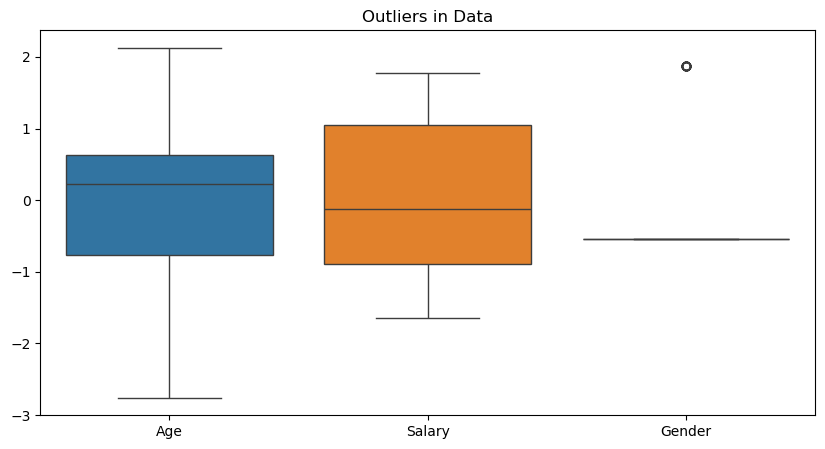

In [105]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Outliers in Data")
plt.show()

In [109]:
print(df.columns)


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [123]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [135]:
print("\nProcessed Data Sample:")
print(df.head())



Processed Data Sample:
   Company       Age    Salary     Place Country    Gender
0      TCS -0.948501 -0.121897   Chennai   India -0.535683
1  Infosys -0.043841 -0.121897    Mumbai   India -0.535683
2      TCS  0.408489 -1.175200  Calcutta   India -0.535683
3  Infosys  0.860819 -0.902122     Delhi   India -0.535683
4      TCS -0.677103 -0.512010    Mumbai   India -0.535683


In [143]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower) | (df[col] > upper), np.nan, df[col])


In [149]:
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where((col < lower) | (col > upper), np.nan, col)

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Apply the outlier removal function to each numeric column
for col in numeric_columns:
    df[col] = remove_outliers(df[col])

# Fill missing values (NaNs) with the median of each numeric column
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [167]:
df.columns = df.columns.str.strip()


In [179]:
# Print the column names to check their exact names
print(df.columns.tolist())


['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']


In [183]:
print(df.columns)


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [185]:
print(df.head())



   Company       Age    Salary     Place Country    Gender
0      TCS -0.948501 -0.121897   Chennai   India -0.535683
1  Infosys -0.043841 -0.121897    Mumbai   India -0.535683
2      TCS  0.408489 -1.175200  Calcutta   India -0.535683
3  Infosys  0.860819 -0.902122     Delhi   India -0.535683
4      TCS -0.677103 -0.512010    Mumbai   India -0.535683
